In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

# ~ PoC AI Pool 2024 ~
- ## Day 2: Neural Networks from Scratch
    - ### Module 1: Linear Regression
-----------

Welcome to the second day of your PoC AI Pool !\
We had to make sure everyone was up to speed on basic python (and ai-related python libs) knowledge before heading into the main topic of this Pool: **machine learning** !

Yesterday, you learned some very useful skills which we'll put into practice in order to build our very first **neural network** :

- python
- numpy (to work with huge numbers and arrays)
- matplotlib (to display graphs and visualise data)
- pandas (to edit and analyse data)

Before we delve deeper into the theory behind a neural network and the various exercises we will ask you to complete throughout this notebook, we'd like to present the overarching problem we will attempt to solve using machine learning !

**The problem**
Brad wishes to buy a house near his workplace. He's gathered a list of house prices in the area, as well as the houses' size in square feet.\
He'd like you to build a program which, given a house's size in square feet, outputs the lot's price.

Here's a sample of data collected by Brad:

|House price  |House size|
|-------------|----------|
|$ 100 000    |100 sq ft |
|$ 200 000    |200 sq ft |
|$ 300 000    |300 sq ft |

<br>

> **Disclaimer**:\
> Of course, Brad could just use simple math in order to solve his problem.\
> It doesn't require a neural network at all ! \
> We must, however, begin our neural journey humbly and work with overly simple problems for now, before delving into problems with thousands of parameters which would be better suited for ML.

In a time where attention spans are at their lowest, we have decided to add a little exercise to reward you for reading more than most people do in a month nowadays :

In [2]:
###
# There's clearly a pattern in Brad's data, use simple math to solve his problem.
# The goal of this exercise is to make sure you remember what you learned yesterday.
# It goes without saying that you must use some of the libs from yesterday in order to solve this exercise !
###

def plot_prices(data: np.array):
    """This function should plot house the given house prices"""
    pass

def get_data(filepath = "./data/houses.csv"):
    """This function should retrieve the data from a csv file and transform it into a numpy array"""
    pass

plot_prices(get_data())

-------------------------

## Part 1: The theory (and some maths)


Now that you have our end goal in mind, let's forget about real estate for a while and talk about neural networks !!!

![Alt text](assets/image-5.png)

It's likely you've dealt with functions before. Let's agree to represent them like the picture above.

You have an input (x) which leads to an output (y).

It's also likely you've heard about polynomial functions ( $ f(x) = ax + b $ ), which we'll represent like so:

![Alt text](assets/image-6.png)

With a weight (a) multiplying our input, as well as a bias (b) adding to it.

Well what if I told you -- and you might realise yourself if you are familiar with pictures of neural networks -- that a neural network is simply a lot of functions mixed with each other ?

![Alt text](assets/image-7.png)

Why don't you try it out for yourself ? A neural network is usually associated with a `forward` method in python implementations. This method will generally take an input, apply the model's transformations to it and return as output a prediction.

For this problem, we will be implementing an algorithm called [**linear regression**](https://en.wikipedia.org/wiki/Linear_regression).

Linear Regression is defined like so:

$$ f(x) = wx + b $$

With $ w $ and $ b $ being our model's **weight** and **bias** respectively. These are variables which are initialised as `0.0` but are gradually updated to fit our data throughout the **training process** using an algorithm called [**gradient descent**](https://www.youtube.com/watch?v=IHZwWFHWa-w&t=485s).

We'll delve into this process later, as it is a little bit more complicated and involves some math. So let's get the easy stuff out of the way and build this `forward` method :

In [3]:
w = 1.2 ## I know I just said the weight and bias were supposed to start at 0.0, 
b = 0.6 ## but it wouldn't get us far if we tested the method by multiplying the input with 0

def forward(x):
    """This method should take a number as input and return a prediction by applying the linear regression formula"""
    ## apply linear regression to x and return the result
    return w * x + b

assert forward(15) == 18.6, "The forward method is incorrectly implemented"

Okay, that wasn't too hard !

But obviously, the forward function by itself is useless. The idea is for **w** and **b** to adjust **x** in such a way that it gets as close to **y** (the true value) as possible.

> To make things clear, in Brad's problem, **x** would correspond to the house **size** and **y** would correspond to the house **price**.\
> Our model makes predictions on **y** (the house's price) given **x** (its size).

In order to update **w** and **b** accordingly, we first need to check how accurate our model is.

To do so, we'll use the [**mean squared error (MSE)**](https://en.wikipedia.org/wiki/Mean_squared_error) loss function to measure the difference between our model's (currently baseless) predictions and the actual data collected by Brad.

The MSE is defined by:

$$ MSE = \frac{1}{N} \sum_{i=1}^n  (y_i - \overline{y}_i)^2 $$

In other words, it is the average of the squared differences between the predictions and the truth values.

The closer the result of this function is to zero, the more accurate our model becomes. So our job is to update **w** and **b** in such a way as to decrease this value, called **loss**.

> **Mathematical explanation (skip this part if you're lazy; if you aren't, grab a notebook and do the equations yourself !)**: \
> In order to achieve this, we will use the mathematical notion of partial derivatives.\
> Because we want to minimize the MSE with respect to **w** and **b**, we need to obtain the partial derivatives with respect to both **w** and **b**.\
> First, you can replace the MSE function with a more detailed version, since we know that $ \overline{y}_i $ can also be written as $ wx + b $ since $ \overline{y}_i $ represents the model's prediction.\
> This gives us:
> $$ MSE = \frac{1}{N} \sum_{i=1}^n  (y_i - (wx_i + b))^2 $$ 
> Now, let's retrieve the partial derivatives of MSE with respect to **w** and **b** (we will use these derivatives in order to update the parameters later)
> You might be familiar with derivatives, they are used to observe the rate of change of a function with respect to a variable, by turning a function like $ f(x) = x^2 $ into $ g(x) = 2x $
> Partial derivatives are similar, except they are used in situations where a function has multiple variables (like a neural network)\
> A partial derivate follows the rules of a regular derivative except every variable that isn't the focus becomes a constant:
> $$ \frac{d_{MSE}}{d_w} = \frac{1}{N} \sum_{i=1}^n  -2(y_i - (wx_i + b))^2 $$ 
> $$ \frac{d_{MSE}}{d_b} = \frac{1}{N} \sum_{i=1}^n  -(y_i - (wx_i + b))^2 $$ 
> For the partial derivative of **w**, we apply the chain rule:\
> We now that the derivative of $ y_i - (wx_i + b) $ is $ -x $ with respect to **w**.\
> Using the chain rule, we can conclude that, because the derivative of $ x^2 $ is $ 2x $, the derivative of MSE with respect to **w** is $ -2(y_i - (wx_i + b))^2 $\
> Same applies to $ \frac{d_{MSE}}{d_b} $, we apply the chain rule to $ -1 $ which is the derivative of $ y_i - (wx_i + b) $ with respect to **b**\

Now that we know how to minimize the MSE, we can update **w** and **b** using the following formula:

$$ w_{new} = w_{old} - \alpha  \frac{d_{MSE}}{d_w} $$
$$ b_{new} = b_{old} - \alpha  \frac{d_{MSE}}{d_b} $$

-------

## Part 2: The building blocks

In [4]:
w, b = 0, 0

def gradient_descent(x: list[float], y: list[float]) -> Tuple[float, float]:
    """
    The goal of this method is, given x and y, to compute the partial derivative with respect to w and b as explained above
    The result of the function must be a tuple containing the two derivatives
    Don't forget to retrieve the average value
    """
    N = len(x)
    dl_dw = 0.0
    dl_db = 0.0

    ## Compute and return the partial derivatives
    for i in range(N):
        dl_dw += -2 * x[i] * (y[i] - (w * x[i] + b))
        dl_db += -2 * (y[i] - (w * x[i] + b))
    dl_dw *= 1/N
    dl_db *= 1/N

    return dl_dw, dl_db

dl_dw, dl_db = gradient_descent([10, 20, 30, 40, 50], [20, 40, 60, 80, 100])
assert (dl_dw, dl_db) == (-4400.0, -120.0), "The answer is probably incorrect !"

And now, we need a method to update **w** and **b** using the result of `gradient_descent` :

In [5]:
def optimizer(w: float, b: float, dl_dw: float, dl_db: float, alpha: float) -> Tuple[float, float]:
    w = w - alpha * dl_dw
    b = b - alpha * dl_db
    return w, b

assert optimizer(w, b, dl_dw, dl_db, alpha=5e-4) == (2.2, 0.06), "Not correct"

Awesome ! We've now gathered all the ingredients to build our very own linear regression !

But ingredients are not enough; we should think about the dosage as well !

In the code below, we've generated some data for you using [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to generate evenly spaced numbers between 100 and 500 (neural networks have a harder time dealing with bigger numbers, so we can [normalize](https://developers.google.com/machine-learning/data-prep/transform/normalization?hl=en) our house prices and sizes and divide them by 100).


We're also initialising two empty lists, which we'll use to store our model's predictions as well as loss.

In the **## Parameters ##** section, we initialize weights and biases to 0.0. These values will be updated with **gradient descent**.

Finally, we have what are known as **hyper-parameters**. Why don't you try and choose these values ?

Take a moment to look up the terms **EPOCH** and **Learning rate** on the internet and try to find a good value for them. Do the same for the amount of samples in `np.linspace`.

There is no arbitrary value for these constants, it depends on what you expect from your network and what your training data is like. We will see more of these hyper parameters as we advance through this pool, but for now try and look these up !

Try and understand what influence these values have by taking these statements in account :

- With a low amount of training samples, the network will train faster, but it also means it will have less experience
- With a low epoch count, the network will train faster, but it will have less time to correct itself
- With a high learning rate, the network will make more rash decisions instead of taking its time to learn (you can see it as a sort of **confidence** rate)

In [6]:
####################### Data #########################
x_values = np.linspace(100, 500, 100) # Choose the amount of samples of data you wish to train on
x_train = np.array(x_values, dtype=np.float32)
y_values = [100*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
x_train /= 100
y_train /= 100
N = len(x_train)
###################### Logging ######################
global_preds = []
loss_history = []
##################### Parameters ####################
w = 0.0
b = 0.0
################## Hyperparameters ##################
EPOCH = 1000 # Choose the amount of times you wish to iterate on the training data
LR = 5e-4 # Choose how quick your neural network will learn (faster != better)
#####################################################

-----------

## Part 3: Training

Finally, we have all we need to create our training loop !

You will be asked to rewrite some of the methods from before and place them all together in one loop which iterates over the epochs !

Don't forget: a neural network consists of :

- Making a prediction
- Comparing the prediction with the truth
- Reviewing the model's "loss"
- Updating the model's parameters
- (optional) Logging the training data in order to draw graphs and analytics later !

Good luck !


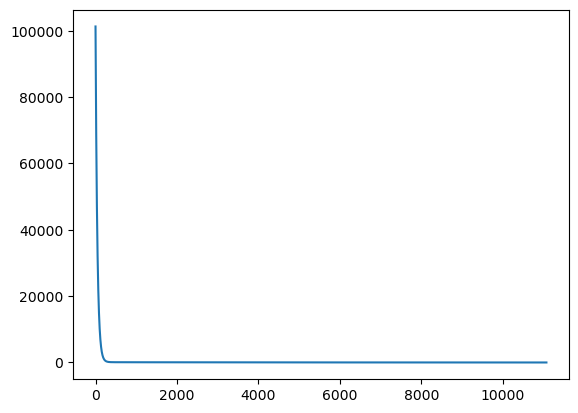

In [7]:
for e in range(EPOCH * 100):
    dl_dw = 0.0
    dl_db = 0.0

    # Logging predictions
    epoch_preds = []
    for i in range(N):
        epoch_preds.append(w * x_train[i] + b)
    if e % 25 == 0:
        ratio = np.all(epoch_preds / y_train >= 0.95) and np.all((epoch_preds / y_train) <= 1.05)
        if ratio == True:
            break
    if e % 50 == 0:
        global_preds.append(np.array(epoch_preds))

    for x, y in zip(x_train, y_train):
        # Prediction
        pred = w * x + b

        # Gradient descent
        dl_dw += -2 * x * (y - pred)
        dl_db += -2 * (y - pred)

    # Getting the average values
    dl_dw *= 1/N
    dl_db *= 1/N

    # Optimization
    w = w - LR * dl_dw
    b = b - LR * dl_db

    # Logging loss
    total_error = 0.0
    for i in range(N):
        total_error += (y_train[i] - (w * x_train[i] + b)) ** 2
    loss_history.append(total_error / N)


plt.plot(loss_history)

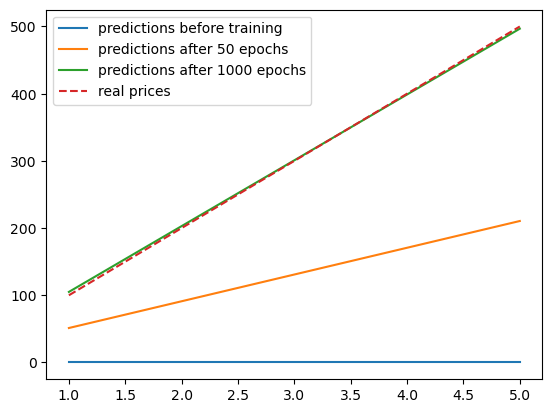

In [8]:
plt.plot(x_train, global_preds[0], label="predictions before training")
plt.plot(x_train, global_preds[1], label="predictions after 50 epochs")
plt.plot(x_train, global_preds[-1], label=f"predictions after {EPOCH} epochs")
plt.plot(x_train, y_train, '--', label="real prices")
plt.legend()
plt.show()

Congrats ! If you're reading this and your model has a high accuracy (represented by the green and red lines being very close to each other on the above graph), it means you've managed to build and train your very own linear regression.

This algorithm is great for training models to forecast linear datasets.

There is another major application of machine learning, **Logistic Regression**, which is used to make classification predictions (i.e: predicting whether an image of a cat or dog is shown).

In the next section, we'll see how that is done !

---

> Let's not forget about Brad ! 

Here's a program that gives him an estimation of the house's price given a size using your model's parameters :

In [22]:
def predict_house_price(size: int):
    size /= 100
    pred = w * size + b
    return pred * 100

answer = predict_house_price(200)
assert answer >= 19000 and answer <= 21000
print(f"The house will cost ${answer:.0f}")

The house will cost $20293
